# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Exploratory Data Analysis 

In [24]:
# loading csv data to dataframe 
df = pd.read_csv('data/Advertising.csv')
# checking out the Data
df.head()

,Unnamed: 0,TV,radio,newpaper,sales
0,0,230.1,37.8,6s9.2,22100.0
1,1,44.5,39.3,45.1,10400.0
2,2,17.2,45.9,69.3,9300.0
3,3,151.5,41.3,58.5,18500.0
4,4,180.8,10.8,58.4,12900.0


In [25]:
df = df.drop('Unnamed: 0', axis=1)
df = df.rename(columns={'newpaper': 'newspaper'})
df['newspaper'] = pd.to_numeric(df['newspaper'], errors='coerce')
# Eliminar la fila con el valor faltante en 'newspaper'
df = df.dropna()

In [26]:
df.head()

,TV,radio,newspaper,sales
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
5,8.7,48.9,75.0,7200.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 1 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         199 non-null    float64
 1   radio      199 non-null    float64
 2   newspaper  199 non-null    float64
 3   sales      199 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [28]:
df.describe()

,TV,radio,newspaper,sales
count,199.000000,199.000000,199.000000,199.000000
mean,146.625126,23.190955,30.359799,13981.909548
std,85.867111,14.848182,21.659246,5198.861022
min,0.700000,0.000000,0.300000,1600.000000
25%,74.050000,9.950000,12.700000,10350.000000
50%,149.700000,22.500000,25.600000,12900.000000
75%,218.450000,36.400000,44.700000,17350.000000
max,296.400000,49.600000,114.000000,27000.000000


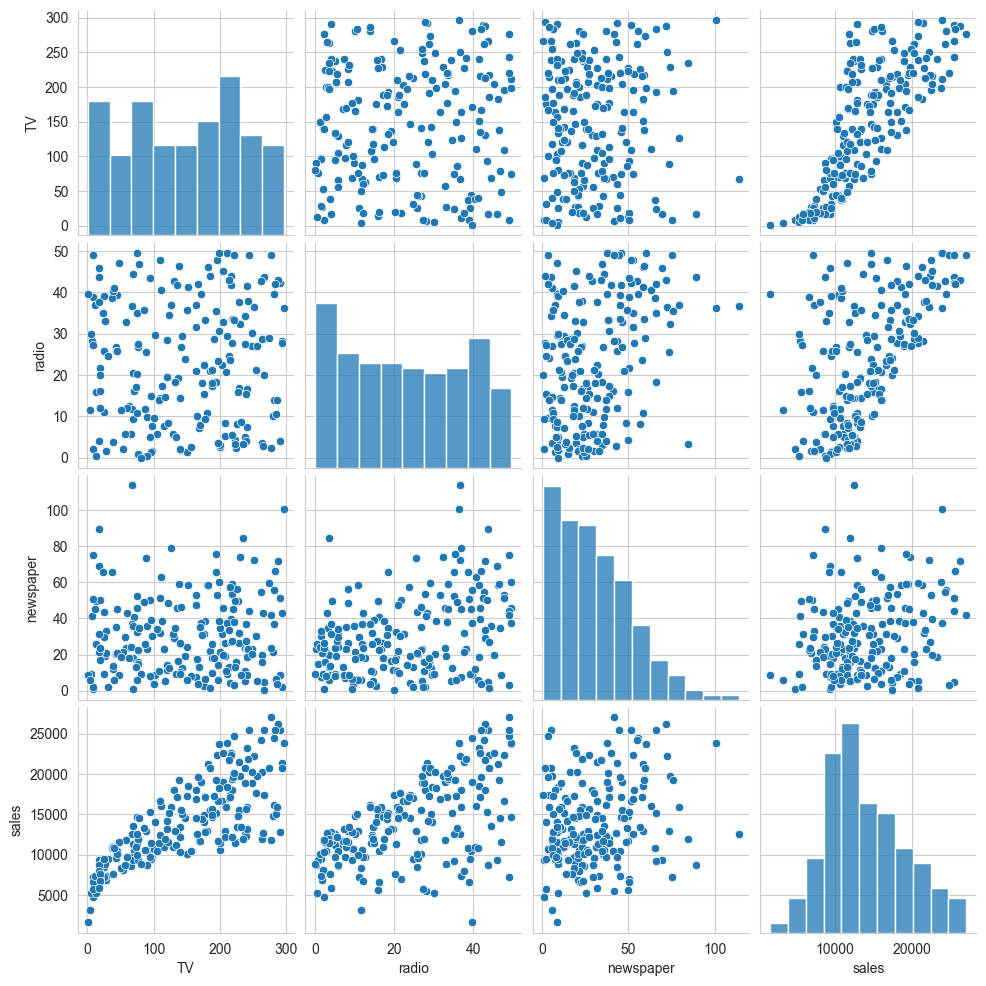

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión para cada variable publicitaria contra las ventas
sns.pairplot(df)
plt.show()

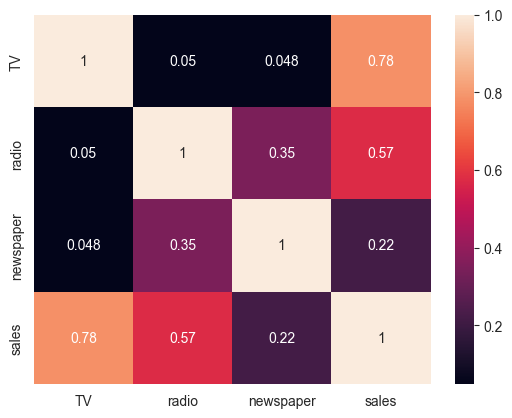

In [30]:
# Matriz de correlación
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

# Definir variables independientes y dependientes
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Dividir en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Inicializar los modelos
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Entrenamiento y evaluación
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} R^2 Score: {score:.4f}")

Linear Regression R^2 Score: 0.8734
Ridge R^2 Score: 0.8734
Lasso R^2 Score: 0.8734
ElasticNet R^2 Score: 0.8734


In [42]:
from sklearn.model_selection import GridSearchCV

# Ejemplo para Ridge
ridge_params = {'alpha': [30, 106, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)

print(f"Mejor parámetro Ridge: {ridge_grid.best_params_}")

Mejor parámetro Ridge: {'alpha': 106}


In [34]:
best_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
best_model.fit(X_train, y_train)

# Coeficientes del modelo
intercept = best_model.intercept_
coefficients = best_model.coef_
print(f"Intercepto: {intercept}, Coeficientes: {coefficients}")

Intercepto: 2661.203518989276, Coeficientes: [ 46.90894367 188.91771414   0.22924292]


In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {scores}")

Cross-Validation Scores: [0.91988671 0.89410343 0.89692012 0.9245367  0.80475698]
